In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import csv

In [2]:
#Creating dataframe from csv file
cumsum_US = pd.read_csv('Citation_data/us_only_citation_cumsum.csv')
cumsum_US.drop(columns=['cited_subcategory_id'], inplace=True)
cumsum_US.head()

cumsum_nonUS = pd.read_csv('Citation_data/non_us_citation_cumsum.csv')
cumsum_nonUS.drop(columns=['cited_subcategory_id'], inplace=True)
cumsum_nonUS.head()

#Read in subcategory labels
subcategories = pd.read_csv('Citation_data/nber_subcategory.tsv', delimiter="\t").set_index('id')

In [18]:
#Create dictionary of node weights
node_weights_US = dict()
row_number = 0
for node in list(cumsum_US.columns):
    node_weights_US[node] = cumsum_US.at[row_number, node]
    row_number += 1
print(node_weights_US)

node_weights_nonUS = dict()
row_number = 0
for node in list(cumsum_nonUS.columns):
    node_weights_nonUS[node] = cumsum_nonUS.at[row_number, node]
    row_number += 1

for dicts in node_weights_nonUS: 
    for keys in dicts: 
        dicts[keys] = float(dicts[keys]) 
print(node_weights_nonUS)

{'11.0': 16054.0, '12.0': 76363.0, '13.0': 50100.0, '14.0': 90002.0, '15.0': 212372.0, '19.0': 765929.0, '21.0': 1547690, '22.0': 1278759, '23.0': 261768, '24.0': 592384, '25.0': 337246, '31.0': 638559, '32.0': 1681872, '33.0': 33751.0, '39.0': 239885.0, '41.0': 306328.0, '42.0': 187339.0, '43.0': 270840.0, '44.0': 115991.0, '45.0': 387434, '46.0': 824966, '49.0': 173459, '51.0': 265183.0, '52.0': 107907.0, '53.0': 214902.0, '54.0': 147290.0, '55.0': 271682, '59.0': 412625.0, '61.0': 160359, '62.0': 293413, '63.0': 100068.0, '64.0': 270755.0, '65.0': 193882.0, '66.0': 63164.0, '67.0': 40848.0, '68.0': 153682.0, '69.0': 612578, '70.0': 0.0}


TypeError: string indices must be integers

In [4]:
#Create graph and add nodes
G_US = nx.MultiDiGraph()
G_US.clear()
for node in list(cumsum_US.columns):
    G_US.add_node(node, weight=node_weights_US[node])
list(G_US.nodes(data=True))

G_nonUS = nx.MultiDiGraph()
G_nonUS.clear()
for node in list(cumsum_nonUS.columns):
    G_nonUS.add_node(node, weight=node_weights_nonUS[node])
list(G_nonUS.nodes(data=True))

[('11', {'weight': 18396}),
 ('12', {'weight': 42413}),
 ('13', {'weight': 19711}),
 ('14', {'weight': 55209}),
 ('15', {'weight': 103809}),
 ('19', {'weight': 369305}),
 ('21', {'weight': 677404}),
 ('22', {'weight': 455665}),
 ('23', {'weight': 289943}),
 ('24', {'weight': 337371}),
 ('25', {'weight': 56892}),
 ('31', {'weight': 197726}),
 ('32', {'weight': 221472}),
 ('33', {'weight': 4873}),
 ('39', {'weight': 48581}),
 ('41', {'weight': 209660}),
 ('42', {'weight': 124045}),
 ('43', {'weight': 131448}),
 ('44', {'weight': 86500}),
 ('45', {'weight': 281560}),
 ('46', {'weight': 557061}),
 ('49', {'weight': 270308}),
 ('51', {'weight': 173410}),
 ('52', {'weight': 81487}),
 ('53', {'weight': 228909}),
 ('54', {'weight': 127875}),
 ('55', {'weight': 160909}),
 ('59', {'weight': 169042}),
 ('61', {'weight': 50490}),
 ('62', {'weight': 47359}),
 ('63', {'weight': 59346}),
 ('64', {'weight': 44171}),
 ('65', {'weight': 74394}),
 ('66', {'weight': 35862}),
 ('67', {'weight': 25585}),
 (

In [5]:
#Add edges with weights
row_number = 0
for node_1 in list(cumsum_US.columns):
    for node_2 in list(cumsum_US.columns):
        if str(node_1) != str(node_2):
            G_US.add_edge(node_1, node_2, weight=cumsum_US.at[row_number, node_2])
    row_number += 1
    
row_number = 0
for node_1 in list(cumsum_nonUS.columns):
    for node_2 in list(cumsum_nonUS.columns):
        if str(node_1) != str(node_2):
            G_nonUS.add_edge(node_1, node_2, weight=cumsum_nonUS.at[row_number, node_2])
    row_number += 1

In [6]:
#Customize node and edge sizes according to size of internal and external linkage
row_number = 0
size_list_US = []
edge_list_US = []
for node in list(cumsum_US.columns):
    size_list_US.append(abs((cumsum_US.at[row_number, node])**(1/1.8)) + 100)
    row_number += 1
print(size_list_US)

row_number = 0
size_list_nonUS = []
edge_list_nonUS = []
for node in list(cumsum_nonUS.columns):
    size_list_nonUS.append(abs((cumsum_nonUS.at[row_number, node])**(1/1.8)) + 100)
    row_number += 1
print(size_list_nonUS)

[316.98771360514627, 616.0749363195299, 508.3390920793556, 665.4084715837912, 1010.9582558239007, 1957.777156854177, 2846.0808545504738, 2569.79206360638, 1123.1837675157153, 1710.6524754399466, 1277.8271462755713, 1779.235796210921, 2975.900496634275, 427.8799066414045, 1074.7440814808579, 1216.5585396204617, 949.64574651941, 1142.734590621351, 750.9821067500409, 1372.1967877329025, 2036.0158862795383, 914.0759227877637, 1130.5781561295366, 725.3723520188188, 1016.9714405714002, 843.3740010018986, 1144.5342937529203, 1417.507439802653, 879.3248450163688, 1190.1556972841004, 699.71068793563, 1142.5527722814343, 966.0058552155754, 564.4378108983584, 464.5537367025992, 861.127168338784, 1740.9285234892268, 100.0]
[334.0403712142266, 472.2483433226172, 343.19198322806204, 530.9728718620602, 712.0645498999454, 1338.7731137198498, 1835.2412569490375, 1492.1692587570965, 1182.97424074096, 1278.0696600962747, 538.2229437300855, 975.5030349734793, 1032.4414495981543, 211.8860093507193, 501.413

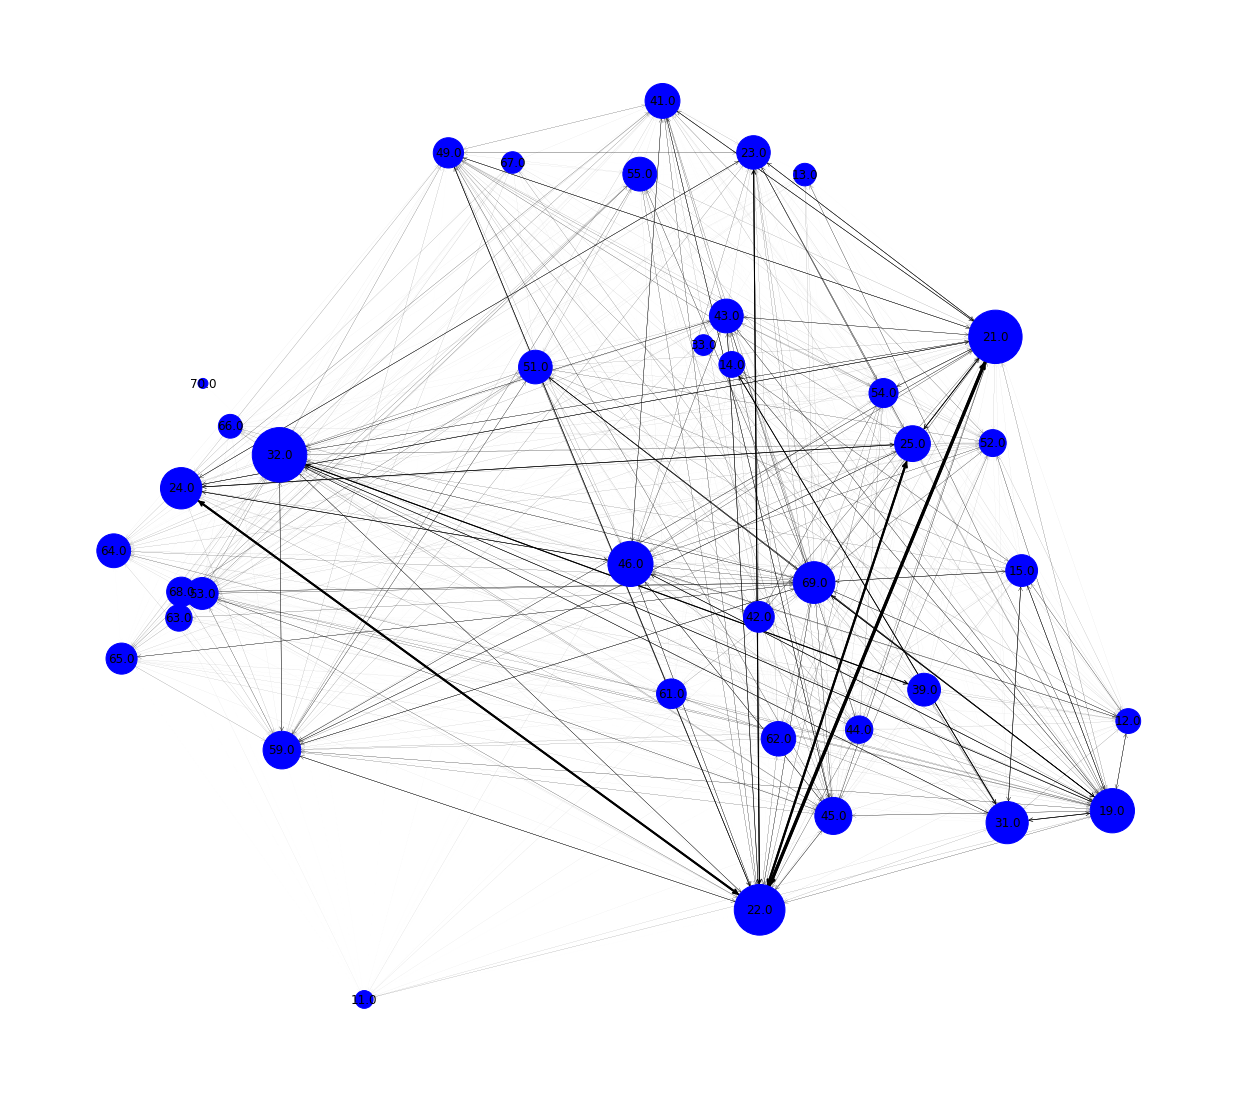

In [7]:
#Run a couple times for a properly spaced graph
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

#Set figure size
from matplotlib.pyplot import figure
figure(figsize=(22, 20))

#Need a better way to figure out positioning other than crossing fingers; its the 70 category that is
#consistently an outlier. See documentation on https://networkx.org/documentation/stable/reference/drawing.html

pos_US = nx.layout.random_layout(G_US)

#Getting edge weights to do some weight calculations on them
_,edge_weight_US = zip(*nx.get_edge_attributes(G_US,'weight').items())
edge_weight_US = list(edge_weight_US)

edge_weight_width_US = [i/100000 for i in edge_weight_US]

nodes_US = nx.draw_networkx_nodes(G_US, pos_US, node_size=size_list_US, node_color="blue")
edges_US = nx.draw_networkx_edges(
    G_US,
    pos_US,
    node_size=size_list_US,
    arrowstyle="->",
    arrowsize=10,
    edge_color= "black",
    edge_cmap=plt.cm.Greys,
    width= edge_weight_width_US,
)
labels_US = nx.draw_networkx_labels(G_US, pos_US)

ax_US = plt.gca()
ax_US.set_axis_off()
plt.show()

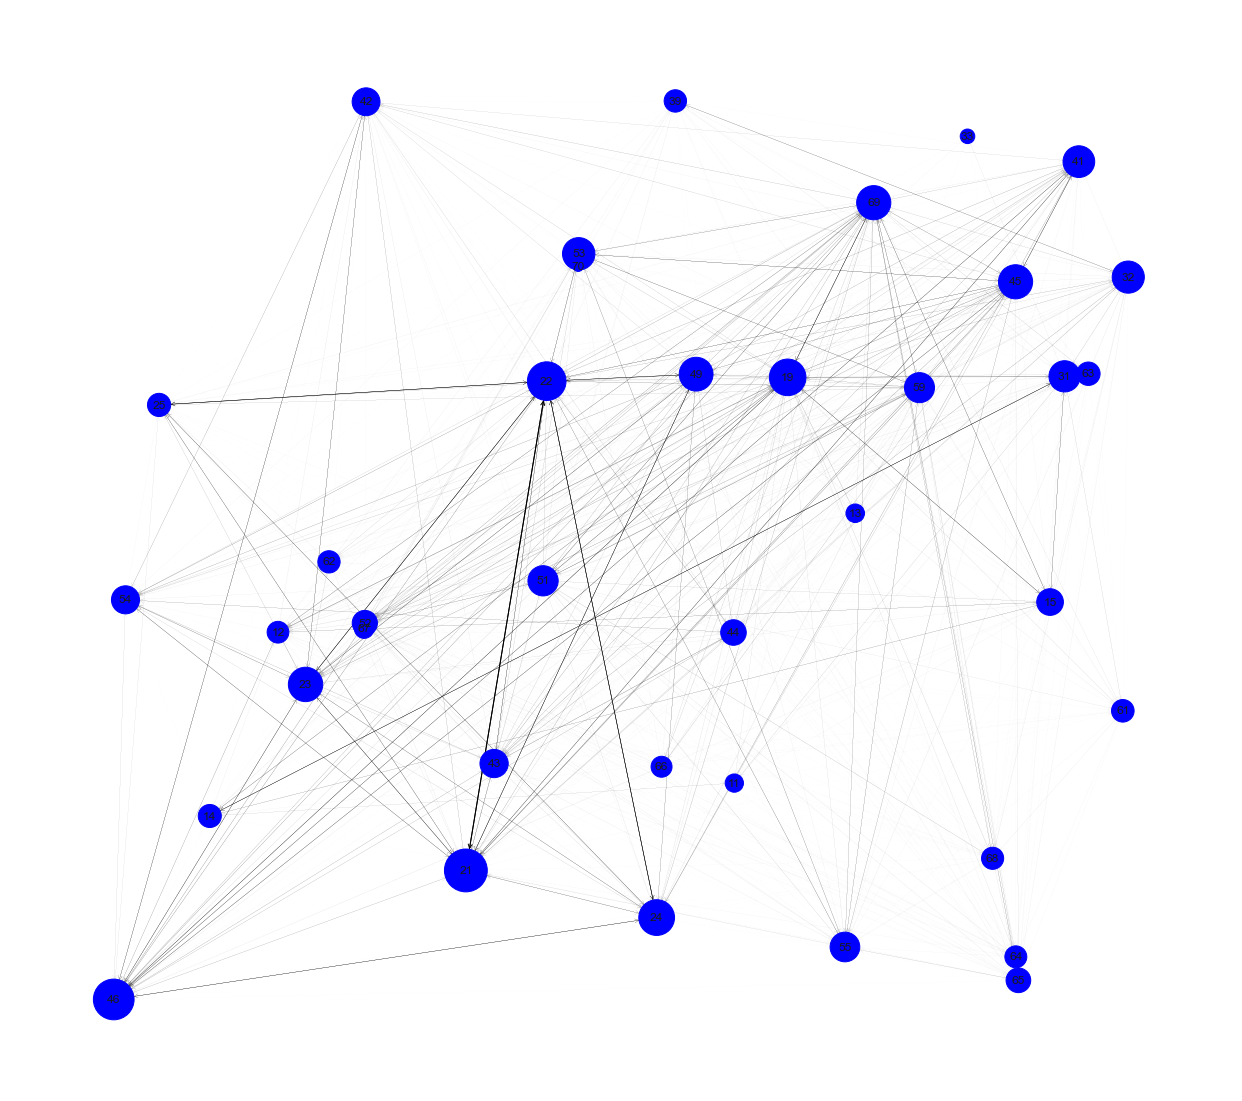

In [14]:
#Run a couple times for a properly spaced graph
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

#Set figure size
from matplotlib.pyplot import figure
figure(figsize=(22, 20))

#Need a better way to figure out positioning other than crossing fingers; its the 70 category that is
#consistently an outlier. See documentation on https://networkx.org/documentation/stable/reference/drawing.html

pos_nonUS = nx.layout.random_layout(G_nonUS)

#Getting edge weights to do some weight calculations on them
_,edge_weight_nonUS = zip(*nx.get_edge_attributes(G_nonUS,'weight').items())
edge_weight_nonUS = list(edge_weight_nonUS)

edge_weight_width_nonUS = [i/100000 for i in edge_weight_nonUS]

nodes_nonUS = nx.draw_networkx_nodes(G_nonUS, pos_nonUS, node_size=size_list_nonUS, node_color="blue")
edges_nonUS = nx.draw_networkx_edges(
    G_nonUS,
    pos_nonUS,
    node_size=size_list_nonUS,
    arrowstyle="->",
    arrowsize=10,
    edge_color= "black",
    edge_cmap=plt.cm.Greys,
    width= edge_weight_width_nonUS,
)
labels_nonUS = nx.draw_networkx_labels(G_nonUS, pos_nonUS)

ax_nonUS = plt.gca()
ax_nonUS.set_axis_off()
plt.show()

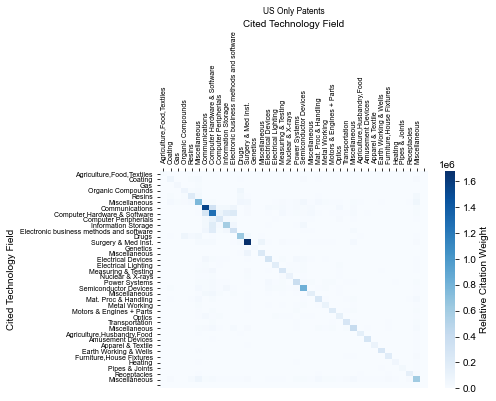

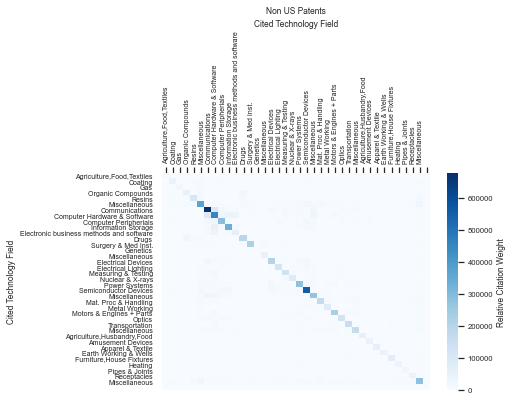

In [9]:
#Visualize the heatmap
hm_US = sns.heatmap(cumsum_US, cmap="Blues", xticklabels=True, yticklabels=True)
hm_US.set_ylabel("Cited Technology Field")
hm_US.set_xlabel("Cited Technology Field")
hm_US.xaxis.set_ticks_position('top')
hm_US.xaxis.set_label_position('top')
hm_US.collections[0].colorbar.set_label("Relative Citation Weight")
sns.set(font_scale=.7)
plt.xticks(rotation=90)
hm_US.set_yticklabels(subcategories.title,
                   size = 7)
hm_US.set_xticklabels(subcategories.title,
                   size = 7)
hm_US.set_title("US Only Patents")
plt.show()

hm_nonUS = sns.heatmap(cumsum_nonUS, cmap="Blues", xticklabels=True, yticklabels=True)
hm_nonUS.set_ylabel("Cited Technology Field")
hm_nonUS.set_xlabel("Cited Technology Field")
hm_nonUS.xaxis.set_ticks_position('top')
hm_nonUS.xaxis.set_label_position('top')
hm_nonUS.collections[0].colorbar.set_label("Relative Citation Weight")
sns.set(font_scale=.7)
plt.xticks(rotation=90)
hm_nonUS.set_yticklabels(subcategories.title,
                   size = 7)
hm_nonUS.set_xticklabels(subcategories.title,
                   size = 7)
hm_nonUS.set_title("Non US Patents")
plt.show()